In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## DATA COLLECTION & ANALYSIS

In [2]:
# LODING THE DATA FROM csv FILE TO PANDAS DATAFRAME

insurance_dataset = pd.read_csv("insurance.csv")

In [3]:
# top 5 rows of dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows & columns
insurance_dataset.shape

(1338, 7)

In [5]:
# getting some  information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## CATEGORICAL FEATURES:
- SEX
- SMOKER
- REGION

# CHECKING FOR MISSING VALUES

In [6]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## DATA ANALYSIS

#STATISTICAL MASURES OF THE DATASET

In [7]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#distribution of age values

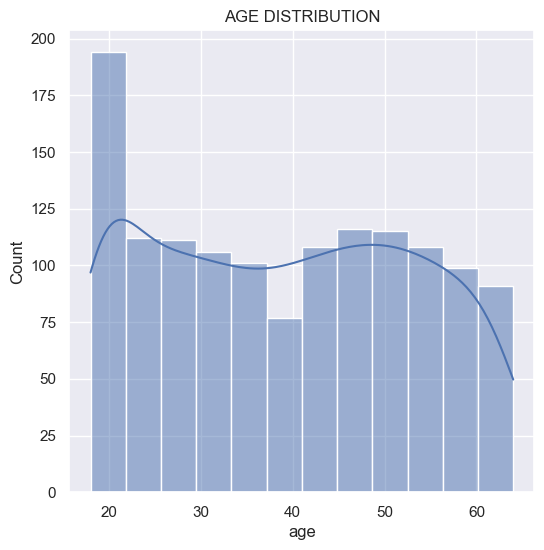

In [8]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['age'],kde=True)
plt.title('AGE DISTRIBUTION')
plt.show()

#GENDER COLUMN

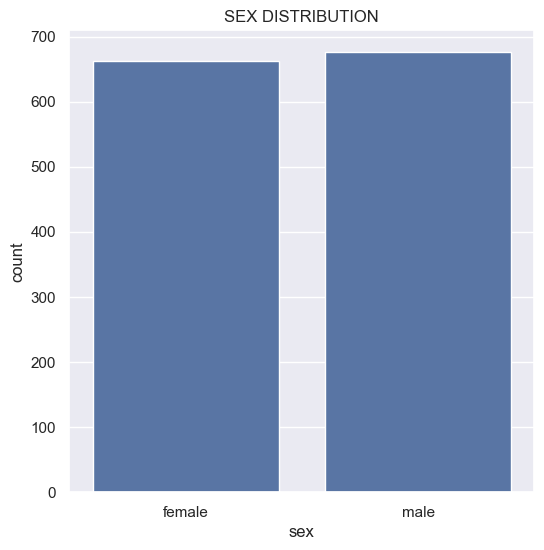

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('SEX DISTRIBUTION')
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

#BMI DISTRIBUTION

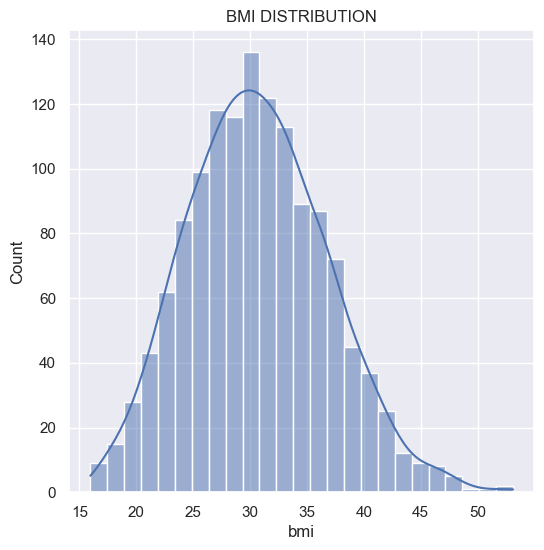

In [11]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'],kde=True)
plt.title('BMI DISTRIBUTION')
plt.show()

- NORMAL BMI RANGE --> 18.5 TO 24.9

#CHILDREN COLUMN

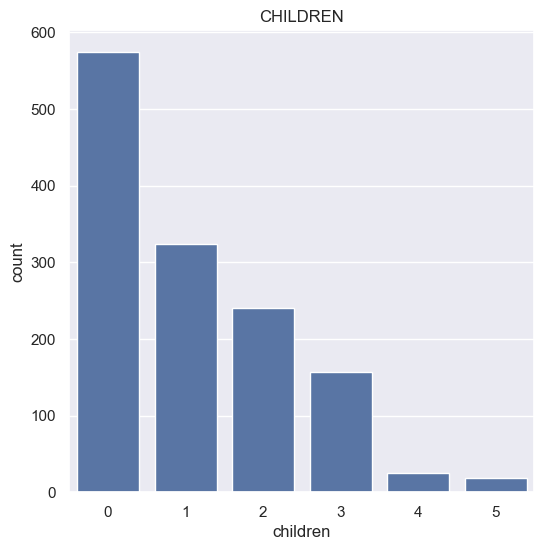

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('CHILDREN')
plt.show()

In [13]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

#SMOKER COLUMN

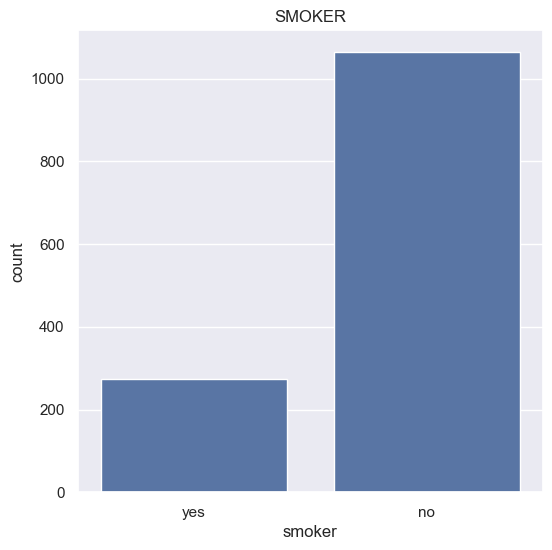

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('SMOKER')
plt.show()

In [15]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

#REGION COLUMN

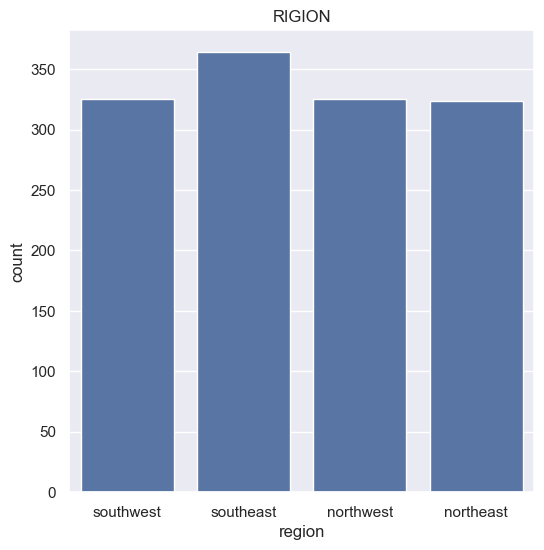

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('RIGION')
plt.show()

In [17]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

#DISTRIBUTION OF CHARGES VALUES

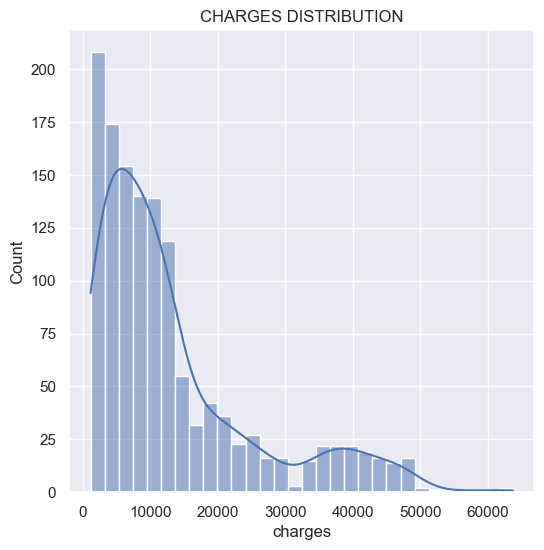

In [18]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['charges'], kde=True)
plt.title('CHARGES DISTRIBUTION')
plt.show()

## DATA PRE-PROCESSING

#ENCODING THE CATEGORICAL FEATURES

In [19]:
pd.set_option('future.no_silent_downcasting', True)

# ENCODING SEX COLUMN
insurance_dataset.replace({'sex':{'male':0, 'female':1}},inplace = True)

# ENCODING SMOKER COLUMN
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace = True)

# ENCODING REGION COLUMN
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace = True)

In [20]:
x = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']

In [21]:
print(x)

      age sex     bmi  children smoker region
0      19   1  27.900         0      0      1
1      18   0  33.770         1      1      0
2      28   0  33.000         3      1      0
3      33   0  22.705         0      1      3
4      32   0  28.880         0      1      3
...   ...  ..     ...       ...    ...    ...
1333   50   0  30.970         3      1      3
1334   18   1  31.920         0      1      2
1335   18   1  36.850         0      1      0
1336   21   1  25.800         0      1      1
1337   61   1  29.070         0      0      3

[1338 rows x 6 columns]


In [22]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


#SPLITTING THE DATA INTO TRAINING DATA & TESTING DATA

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [24]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# MODEL TRAINING

#LINEAR REGRESSION

In [25]:
# LOADING THE LINEAR REGRESSION MODEL
regressor = LinearRegression()

In [26]:
regressor.fit(x_train, y_train)

LinearRegression()

#MODEL EVALUATION

In [27]:
#PRADICTION ON TRAINING DATA
training_data_pradiction = regressor.predict(x_train)

In [28]:
# r squared value
r2_train = metrics.r2_score(y_train, training_data_pradiction)
print(' r squared value : ',r2_train) 

 r squared value :  0.751505643411174


#BUILDING A PREDICTIVE SYSTEM

In [29]:
input_data=(55,1,26.98,0,1,3)

#changing import data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshap the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

predicition = regressor.predict(input_data_reshaped)
print(predicition)

print('The Insurance cost is USD',predicition[0])





[10840.47228611]
The Insurance cost is USD 10840.472286111117


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
